In [4]:
# Import relevant libraries and packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm 


In [ ]:

from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
#Plots a line given an intercept and slope.

from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
#  r2s(coefficient of determination) regression score function.

from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
#plit arrays or matrices into random train and test subsets.

from sklearn.feature_selection import RFECV
#Feature selection

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
#Ordinary least squares Linear Regression.The sklearn.preprocessing package provides several common utility functions and transformer classes to change raw feature vectors into a
#representation that is more suitable for the downstream estimators.
import scipy


In [2]:
from mrmr import mrmr_classif

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif



In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.5 MB/s eta 0:00:00


In [31]:
import shap
shap.initjs()

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reducedfeature_09122023.csv')

In [ ]:
data = data.drop(columns=['age_group'])

In [ ]:
data.head()

,msno,is_churn,registered_via,max_payment_method,avg_amt_paid,sum_amt_paid,change_in_amt_paid,autorenew_not_cancel_flag,last_month_login_count,last_month_sum_num25,...,last_third_month_sum_num75,last_third_month_sum_num985,last_third_month_total_secs_sum,diff_last2month_sum_num25,diff_last2month_sum_num75,diff_last2month_sum_num985,age_group,diff_last2month_total_secs_sum,autorenew_cancel_flag,Days_Diff_trans_expire_date
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,3.0,38,149.000,894,1,1,11.0,186.0,...,0.0,0.0,1251.655,143.0,9.0,9.0,"(20, 30]",68125.943,0,30
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,3.0,38,134.500,807,3,0,6.0,0.0,...,2.0,8.0,16063.611,-16.0,0.0,-3.0,"(10, 20]",-11487.714,0,31
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,3.0,38,149.100,2982,3,0,20.0,239.0,...,53.0,40.0,93466.670,57.0,6.0,4.0,"(10, 20]",-336.420,0,93
3,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,7.0,41,117.125,3748,3,1,15.0,9.0,...,0.0,1.0,968.371,-65.0,2.0,-2.0,"(30, 40]",194386.863,0,186
4,ibIHVYBqxGwrSExE63/omeDD99M5vYB3CN2HzkEY+eM=,1,3.0,40,149.000,3129,1,0,4.0,6.0,...,2.0,4.0,16939.814,-57.0,-17.0,-9.0,"(20, 30]",-59574.465,1,-2


In [ ]:
X =data.iloc[:,2:]
y = data.iloc[:,1]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800505 entries, 0 to 800504
Data columns (total 29 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   msno                              800505 non-null  object 
 1   is_churn                          800505 non-null  int64  
 2   registered_via                    800505 non-null  float64
 3   max_payment_method                800505 non-null  int64  
 4   avg_amt_paid                      800505 non-null  float64
 5   sum_amt_paid                      800505 non-null  int64  
 6   change_in_amt_paid                800505 non-null  int64  
 7   autorenew_not_cancel_flag         800505 non-null  int64  
 8   last_month_login_count            800505 non-null  float64
 9   last_month_sum_num25              800505 non-null  float64
 10  last_month_sum_num75              800505 non-null  float64
 11  last_month_sum_num985             800505 non-null  f

Optimal number of features : 10
Best features : ['max_payment_method', 'avg_amt_paid', 'sum_amt_paid', 'change_in_amt_paid', 'autorenew_not_cancel_flag', 'last_month_login_count', 'last_second_month_login_count', 'last_third_month_login_count', 'autorenew_cancel_flag', 'Days_Diff_trans_expire_date']


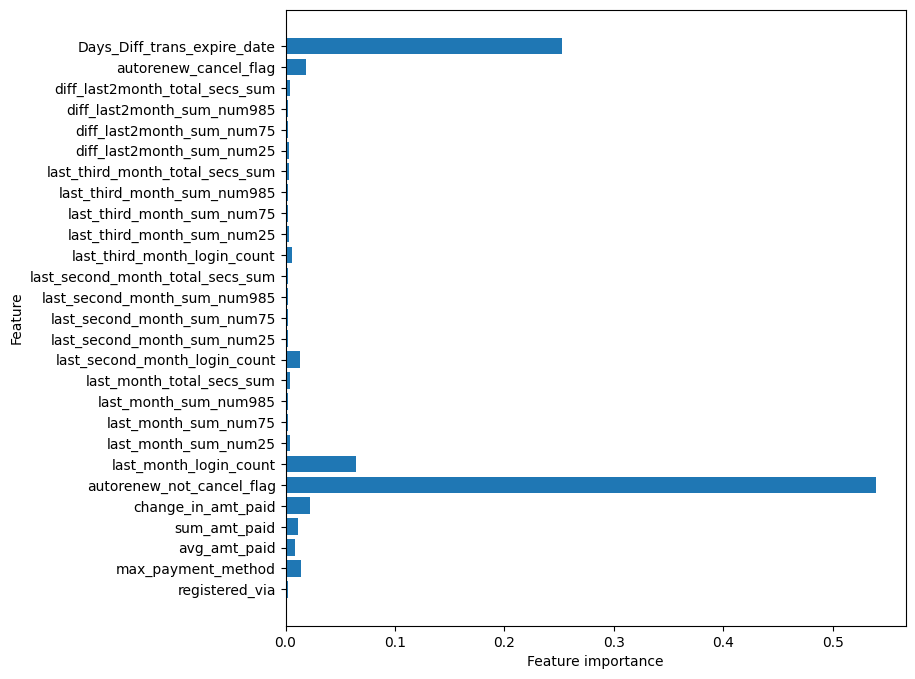

In [ ]:

cv_estimator = XGBClassifier(random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
cv_estimator.fit(X_train,y_train)
cv_selector = RFECV(cv_estimator,cv=5,step=1,scoring='roc_auc')
cv_selector = cv_selector.fit(X_train,y_train)
rfecv_mask = cv_selector.get_support() #list of booleans
rfecv_features = []
for bool, feature in zip(rfecv_mask,X_train.columns):
    if bool:
        rfecv_features.append(feature)
print('Optimal number of features :', cv_selector.n_features_)
print('Best features :', rfecv_features)
n_features = X_train.shape[1]
plt.figure(figsize=(8,8))
plt.barh(range(n_features), cv_estimator.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns.values)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.98      0.98    220385
           1       0.78      0.88      0.82     19767

    accuracy                           0.97    240152
   macro avg       0.88      0.93      0.90    240152
weighted avg       0.97      0.97      0.97    240152



No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


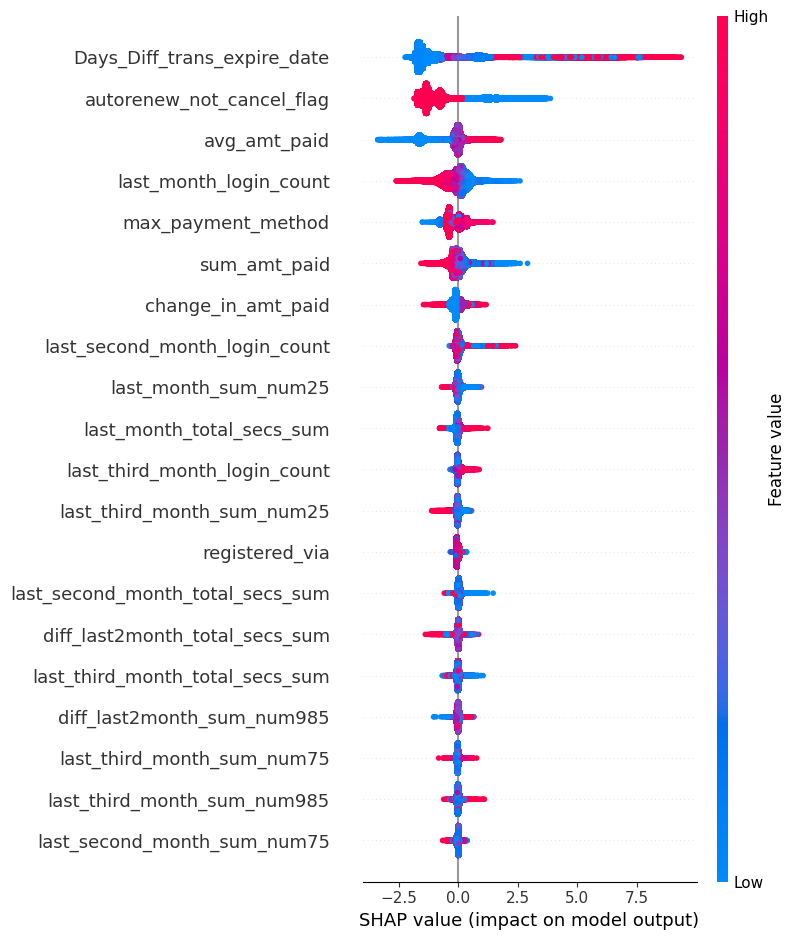

In [34]:


cv_estimator = XGBClassifier(random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)
cv_estimator.fit(X_train,y_train)


# calculate SHAP values
y_pred = cv_estimator.predict(X_test)
# Classification Report
print(classification_report(y_pred, y_test))

explainer = shap.Explainer(cv_estimator)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [ ]:
# ANOVA INFERENTIAL TEST
#H0: Means of all groups are equal.
#H1: At least one mean of the groups are different.
columns = X.columns
selector = SelectKBest(f_classif, k = 15)
X_new = selector.fit_transform(X,y)
feature_scores = list(zip(selector.scores_,columns))


In [ ]:
print('feature importance: ', selector.scores_)
print('pvalues: ', selector.pvalues_)


feature importance:  [4.72467310e+03 1.87026124e+04 1.42030094e+05 7.24105052e+01
 1.76685776e+04 2.68714314e+05 3.67345930e+03 2.47001437e+02
 2.98718329e+02 1.70104400e+02 6.07376284e+02 2.09896536e+02
 2.04649625e+02 3.06379436e+02 8.42396721e+01 8.84917500e+01
 6.72078891e+01 1.70682907e+02 2.70361844e+02 9.63107755e+01
 6.74433817e+01 1.90399046e+03 2.58673641e+03 1.06200591e+03
 4.04312053e+03 7.25470611e+04 1.93951015e+05]
pvalues:  [0.00000000e+000 0.00000000e+000 0.00000000e+000 1.75075352e-017
 0.00000000e+000 0.00000000e+000 0.00000000e+000 1.19263915e-055
 6.44446494e-067 7.08491174e-039 4.67293112e-134 1.46713467e-047
 2.04630921e-046 1.38282189e-068 4.39282364e-020 5.11751316e-021
 2.44689525e-016 5.29677270e-039 9.68349576e-061 9.84848857e-023
 2.17142432e-016 0.00000000e+000 0.00000000e+000 8.51024664e-233
 0.00000000e+000 0.00000000e+000 0.00000000e+000]


In [ ]:

feature_scores = list(zip(selector.scores_,columns))
sorted_feature_scores = sorted(feature_scores,reverse=True)



In [ ]:
sorted_feature_scores

[(268714.3137215142, 'autorenew_not_cancel_flag'),
 (193951.01531945405, 'Days_Diff_trans_expire_date'),
 (142030.09350365016, 'avg_amt_paid'),
 (72547.06112994999, 'autorenew_cancel_flag'),
 (18702.61239892274, 'max_payment_method'),
 (17668.577645200992, 'change_in_amt_paid'),
 (4724.673097207978, 'registered_via'),
 (4043.120527107338, 'diff_last2month_total_secs_sum'),
 (3673.4593032162916, 'last_month_login_count'),
 (2586.7364143377463, 'diff_last2month_sum_num75'),
 (1903.9904615228122, 'diff_last2month_sum_num25'),
 (1062.0059053355085, 'diff_last2month_sum_num985'),
 (607.3762839504298, 'last_month_total_secs_sum'),
 (306.37943564005064, 'last_second_month_sum_num75'),
 (298.7183292795222, 'last_month_sum_num75'),
 (270.3618439685025, 'last_third_month_sum_num75'),
 (247.00143653698774, 'last_month_sum_num25'),
 (209.8965359350927, 'last_second_month_login_count'),
 (204.649624740507, 'last_second_month_sum_num25'),
 (170.68290734753566, 'last_third_month_sum_num25'),
 (170.10

In [ ]:
num_list = []
col_list = []
for i in range(len(sorted_feature_scores)):
   num_list.append((sorted_feature_scores[i])[0])
   col_list.append((sorted_feature_scores [i])[1])

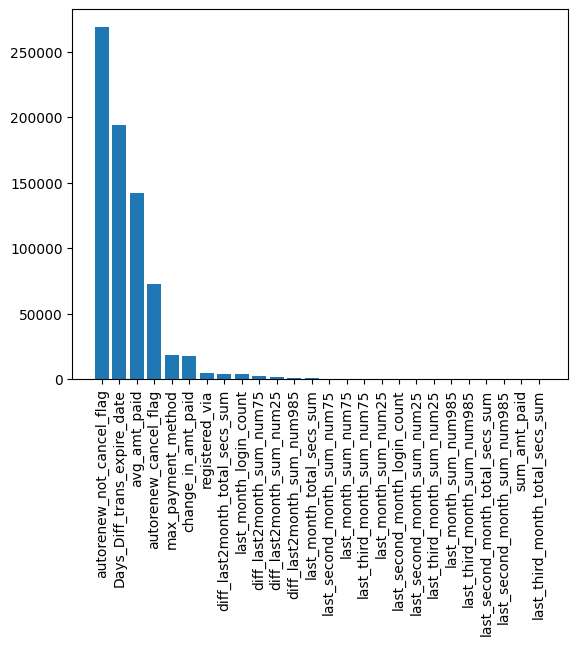

In [ ]:
_= plt.bar(col_list[0:26],num_list[0:26])
_= plt.xticks(rotation=90)


In [ ]:
def prec_rec_auc(y,y_prob):
  precision, recall, thresholds  = precision_recall_curve(y,y_prob)
  auc_val = auc(recall,precision)
  return auc_val

cv_estimator = XGBClassifier(random_state=42)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)
cv_selector =  cv_estimator.fit(X,y)
y_prob = cv_selector.predict_proba(X)[:,1]
scoring = make_scorer(prec_rec_auc, needs_proba = True)
cv_selector = RFECV(cv_estimator,cv=5,step=2,scoring=scoring)
cv_selector = cv_selector.fit(X,y)
rfecv_mask = cv_selector.get_support() #list of booleans
rfecv_features = []
for bool, feature in zip(rfecv_mask,X.columns):
    if bool:
        rfecv_features.append(feature)
print('Optimal number of features :', cv_selector.n_features_)
print('Best features :', rfecv_features)
n_features = X.shape[1]
plt.figure(figsize=(8,8))
plt.barh(range(n_features), cv_estimator.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns.values)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [5]:
#MRMR

data = pd.read_csv('../data/processed/preprocessed.csv')

In [10]:
del data['Unnamed: 0']

In [11]:
X = data.drop(['is_churn','msno'],axis=1)
y= data[['is_churn']]


In [12]:
selected_features = mrmr_classif(X=X,y=y,K=20)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:20<00:00,  1.02s/it]


In [13]:
selected_features

['autorenew_not_cancel_flag',
 'diff_last2month_sum_num50',
 'Days_Diff_trans_expire_date',
 'last_cancel_status',
 'avg_plan_days',
 'last_auto_renew',
 'avg_list_price',
 'avg_amt_paid',
 'change_in_payment_method',
 'avg_days_diff_trans_exp',
 'total_transaction',
 'max_payment_method',
 'change_in_amt_paid',
 'diff_last2month_sum_num100',
 'registered_via',
 'change_in_plan_days',
 'diff_last2month_sum_num_unq',
 'city',
 'change_in_list_price',
 'last_month_login_count']